**Проект: Статистический анализ данных**

В рамках данного проекта мы проведем статистический анализ данных, полученных от пользователей сервиса аренды самокатов GoFast. Цель нашего исследования заключается в выявлении ключевых факторов, влияющих на использование сервиса, а также в проверке гипотез, которые могут способствовать улучшению качества предоставляемых услуг.

В рамках нашего анализа мы будем работать с данными о пользователях, их поездках и подписках, чтобы выявить закономерности и предложить рекомендации по оптимизации тарифных планов и увеличению числа пользователей.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#### Шаг 1. Загрузка данных

In [2]:
data1 = pd.read_csv('/datasets/users_go.csv')
data2 = pd.read_csv('/datasets/rides_go.csv')
data3 = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
data1.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
data2.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
data3.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Данные были успешно импортированы и изучена общая информация о них.

#### Шаг 2. Предобработка данных

In [9]:
data2['date'] = pd.to_datetime(data2['date'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [10]:
data2['month'] = data2['date'].dt.month
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [11]:
data1.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
data2.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [13]:
data3.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [14]:
data1.duplicated().sum(), data2.duplicated().sum(), data3.duplicated().sum()

(31, 0, 0)

In [15]:
data1 = data1.drop_duplicates().reset_index(drop=True)


In [16]:
data1.duplicated().sum()

0

*Вывод:* был изменен тип данных столбца date в data2, также создан новый столбец month

Была произведена проверка на наличие явных дубликатов во всех датафреймах: в data1 было 31 явных дубликатов, в data2 и data3 дубликатов нет

Была сделана очистка data1 от явных дубликатов и повторная проверка

#### Шаг 3. Исследовательский анализ данных

In [17]:
data1['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


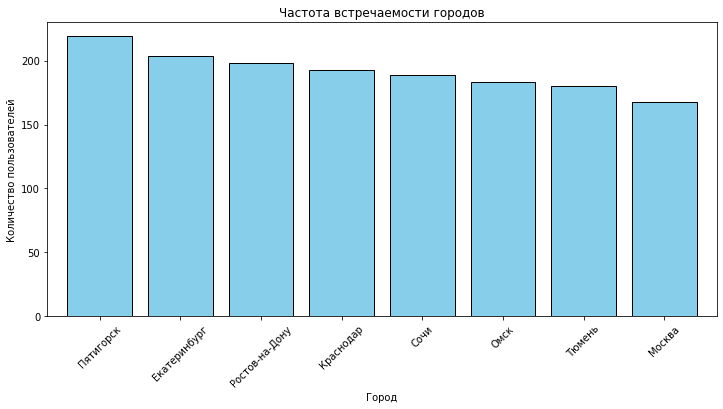

In [18]:
city_counts = data1['city'].value_counts()
print(city_counts)

plt.figure(figsize=(12, 6))

city_counts.plot(kind='bar', edgecolor='black', color='skyblue', width=0.8)

plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')

plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.show()


In [19]:
subscription_counts = data1['subscription_type'].value_counts()
subscription_counts

free     835
ultra    699
Name: subscription_type, dtype: int64

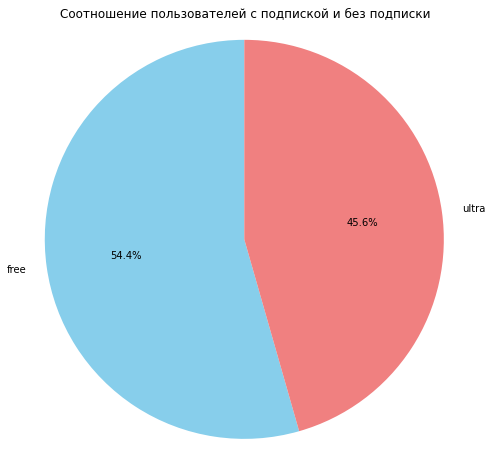

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.axis('equal')
plt.show()

In [21]:
data1['age'].value_counts(), data1['age'].max(), data1['age'].min(),data1['age'].median()

(25    145
 24    132
 26    131
 23    129
 27    119
 22    119
 28    112
 21     93
 20     71
 30     68
 29     68
 31     48
 19     47
 18     46
 32     41
 33     39
 17     26
 34     19
 16     19
 35     15
 15     13
 14      9
 13      8
 36      6
 12      4
 38      3
 37      2
 39      1
 43      1
 Name: age, dtype: int64,
 43,
 12,
 25.0)

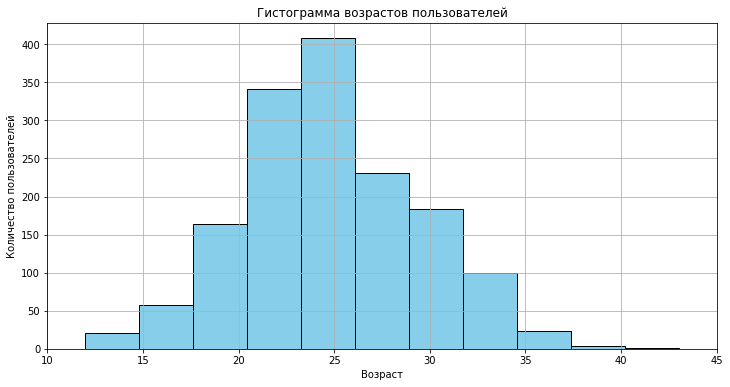

In [22]:
plt.figure(figsize=(12, 6))

data1['age'].hist(bins = 11, edgecolor='black', color='skyblue')
plt.title('Гистограмма возрастов пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.xlim(10, 45)

plt.show()

In [23]:
merged_data =  pd.merge(data1, data2, on='user_id', how='left')
merged_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


In [24]:
merged_data['distance'].max(), merged_data['distance'].min(), merged_data['distance'].median()

(7211.007744598519, 0.855682925681208, 3133.6099936787664)

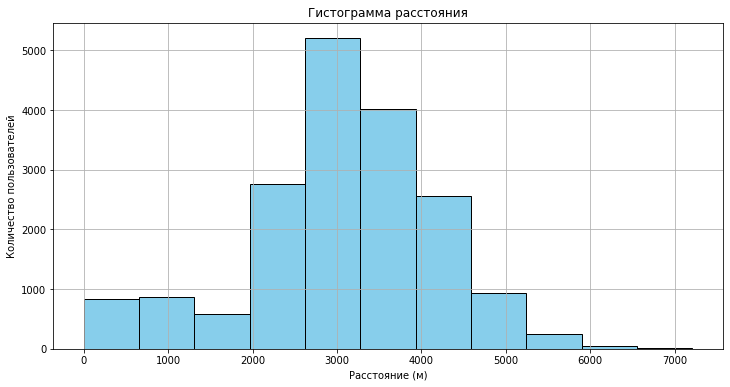

In [25]:
plt.figure(figsize=(12, 6))

merged_data['distance'].hist(bins = 11, edgecolor='black', color='skyblue')
plt.title('Гистограмма расстояния')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество пользователей')

plt.show()

In [26]:
merged_data['duration'].max(), merged_data['duration'].min(), merged_data['duration'].median()

(40.82396261922424, 0.5, 17.678394530393803)

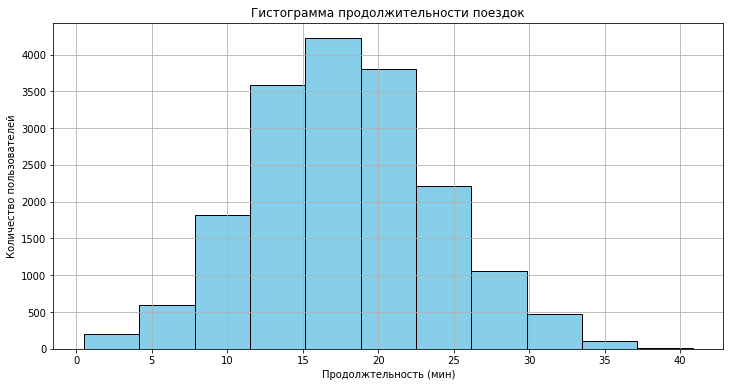

In [27]:
plt.figure(figsize=(12, 6))

merged_data['duration'].hist(bins = 11, edgecolor='black', color='skyblue')
plt.title('Гистограмма продолжительности поездок')
plt.xlabel('Продолжтельность (мин)')
plt.ylabel('Количество пользователей')

plt.show()

In [28]:
merged_data[merged_data['duration'] <= 1].sort_values(by='distance')

,user_id,name,age,city,subscription_type,distance,duration,date,month
15132,1325,Амалия,36,Сочи,free,4030.308008,0.5,2021-12-22,12
17909,1524,Матвей,32,Москва,free,4103.998874,0.5,2021-06-18,6
10692,1006,Эльмира,25,Ростов-на-Дону,free,4106.278268,0.5,2021-10-31,10
9698,937,Родион,22,Ростов-на-Дону,free,4169.066800,0.5,2021-12-12,12
14342,1268,Юлия,26,Краснодар,free,4177.139336,0.5,2021-06-09,6
...,...,...,...,...,...,...,...,...,...
14574,1285,Станислав,27,Пятигорск,free,6316.574814,0.5,2021-09-25,9
13701,1224,Александр,25,Пятигорск,free,6414.516026,0.5,2021-07-15,7
11385,1057,Адель,26,Москва,free,6601.197575,0.5,2021-02-07,2
17242,1477,Ян,17,Сочи,free,6724.932981,0.5,2021-01-12,1


In [29]:
merged_data = merged_data.query('duration > 1')

<div class="alert alert-info"> <b>Комментарий</b> рассмотрела поездки с подолжительностью не дольше 1 минуты, могу сделать вывод о том, что это сбой в системе. Максимальная скорость самокатов окло 25 км/ч, за 30 секунд максиильманое расстроение могло бы быть 210м, но не 4030м. Также на всякий случай проверила другие короткие поездки (от 1 до 5 мин), но там расстояние соответствует действительности </div>

**Вывод:**
1. Больше всего пользователей из Пятигорска (219), меньше всего из Москвы (168).
2. 54.4% пользователей не имеют подписки, а 45.6% имеют.
3. Возраст пользователей варьируется от 12 до 43, однако большему проценту пользователей 25 лет.
4. Больший процент пользователей за свою поездку проехал 3150м.
5. Самая частая продолжительность поездки составляет 17-18 мин.

#### Шаг 4. Объединение данных

In [30]:
full_data = pd.merge(merged_data, data3, on='subscription_type', how='left')
full_data['duration'] = np.ceil(full_data['duration']).astype('int')
full_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199


In [31]:
data_query1 = full_data.query('subscription_type == "ultra"')
data_query1.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199


In [32]:
data_query2 = full_data.query('subscription_type != "ultra"')
data_query2.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18,2021-02-14,2,8,50,0


In [33]:
data_query1['distance'].max(), data_query1['distance'].min(), data_query1['distance'].median()

(5699.769662039453, 244.21043833522924, 3148.6372291760854)

In [35]:
,data_query2['distance'].max(), data_query2['distance'].min(), data_query2['distance'].median()

(7066.003771911003,
 ("data_query2['distance'].min(),", "data_query2['distance'].median()"))

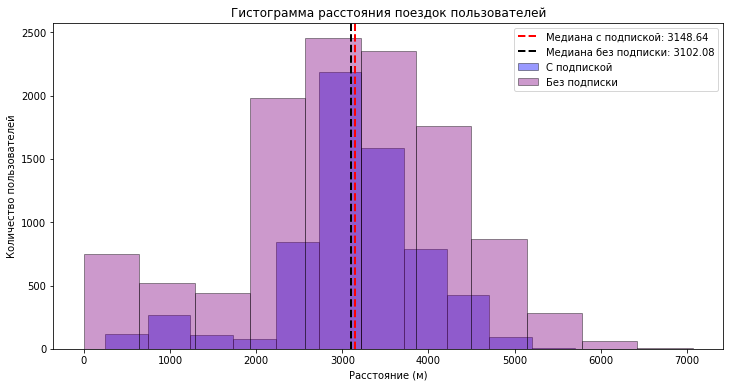

In [37]:
plt.figure(figsize=(12, 6))

plt.hist(data_query1['distance'], bins=11, edgecolor='black', color='blue', alpha=0.4, label='С подпиской')


plt.hist(data_query2['distance'], bins=11, edgecolor='black', color='purple', alpha=0.4, label='Без подписки')

median1 = data_query1['distance'].median()
median2 = data_query2['distance'].median()
plt.axvline(median1, color='red', linestyle='dashed', linewidth=2, label=f'Медиана с подпиской: {median1:.2f}')
plt.axvline(median2, color='black', linestyle='dashed', linewidth=2, label=f'Медиана без подписки: {median2:.2f}')

plt.title('Гистограмма расстояния поездок пользователей')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество пользователей')
plt.legend() 


plt.show()

In [38]:
data_query1['duration'].max(), data_query1['duration'].min(), data_query1['duration'].median()

(41, 4, 19.0)

In [40]:
data_query2['duration'].max(), data_query2['duration'].min(), data_query2['duration'].median()

(35, 3, 18.0)

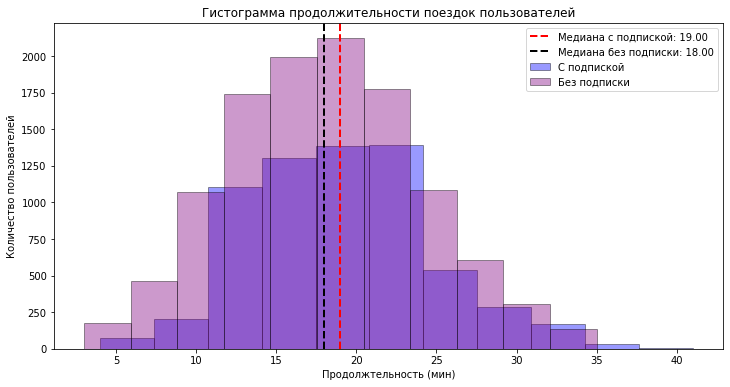

In [42]:
plt.figure(figsize=(12, 6))

plt.hist(data_query1['duration'], bins=11, edgecolor='black', color='blue', alpha=0.4, label='С подпиской')


plt.hist(data_query2['duration'], bins=11, edgecolor='black', color='purple', alpha=0.4, label='Без подписки')


median1 = data_query1['duration'].median()
median2 = data_query2['duration'].median()
plt.axvline(median1, color='red', linestyle='dashed', linewidth=2, label=f'Медиана с подпиской: {median1:.2f}')
plt.axvline(median2, color='black', linestyle='dashed', linewidth=2, label=f'Медиана без подписки: {median2:.2f}')


plt.title('Гистограмма продолжительности поездок пользователей')
plt.xlabel('Продолжтельность (мин)')
plt.ylabel('Количество пользователей')
plt.legend() 


plt.show()

**Вывод:** 
1. Мединанное значение расстояния поездкок у пользователей с подпиской больше, чем у пользователей без нее
2. Продолжительности поездкок у пользователей с подпиской больше, чем у пользователей без нее

#### Шаг 5. Подсчёт выручки

In [43]:
aggregated_data = full_data.groupby(['user_id', 'month']).agg(
    total_distance=('distance', 'sum'),
    total_rides=('distance', 'count'),
    total_duration=('duration', 'sum')
).reset_index()
aggregated_data.head()

,user_id,month,total_distance,total_rides,total_duration
0,1,1,7027.511294,2,42
1,1,4,754.159807,1,7
2,1,8,6723.470560,2,46
3,1,10,5809.911100,2,32
4,1,11,7003.499363,3,56


In [44]:
aggregated_data.head()

,user_id,month,total_distance,total_rides,total_duration
0,1,1,7027.511294,2,42
1,1,4,754.159807,1,7
2,1,8,6723.470560,2,46
3,1,10,5809.911100,2,32
4,1,11,7003.499363,3,56


In [45]:
aggregated_data = aggregated_data.merge(data1[['user_id', 'subscription_type']], on='user_id', how='left')
aggregated_data.isna().sum()

user_id              0
month                0
total_distance       0
total_rides          0
total_duration       0
subscription_type    0
dtype: int64

In [46]:
def revenue_count(row):
    if row['subscription_type'] == 'ultra':
        price = 6 * row['total_duration'] + 199
        return price
    else:
        price_without = (50 * row['total_rides']) + (8 * row['total_duration'])
        return price_without

aggregated_data['revenue'] = aggregated_data.apply(revenue_count, axis=1)

aggregated_data.head()

,user_id,month,total_distance,total_rides,total_duration,subscription_type,revenue
0,1,1,7027.511294,2,42,ultra,451
1,1,4,754.159807,1,7,ultra,241
2,1,8,6723.470560,2,46,ultra,475
3,1,10,5809.911100,2,32,ultra,391
4,1,11,7003.499363,3,56,ultra,535


In [47]:
data_hypothesis3_1 = aggregated_data.query('subscription_type == "ultra"')
data_hypothesis3_2 = aggregated_data.query('subscription_type != "ultra"')

*Комментарий студента*: эти датафреймы нужны мне для проверки гипотезы №3

In [48]:
aggregated_data.drop(columns=['subscription_type'], inplace=True)

*Итог*: был создан датафрейм с агрегированными данными и подсчитана выручка для пользователей обеих групп за каждый месяц

#### Шаг 6. Проверка гипотез

Гипотеза №1

H0 : m1 = m2

H' : m1 > m2

In [49]:
subscription_durations = data_query1['duration']
non_subscription_durations = data_query2['duration']

t_statistic, p_value = stats.ttest_ind(subscription_durations, non_subscription_durations, equal_var=False ,alternative='greater')

print(f"T-статистика: {t_statistic}")
print(f"P-значение: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Отклоняем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.")
else:
    print("Не удалось отклонить нулевую гипотезу: нет достаточных доказательств, что пользователи с подпиской тратят больше времени на поездки.")

T-статистика: 11.18719386710581
P-значение: 3.086332092684639e-29
Отклоняем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.


Гипотеза №2

H0: m1 = 3130

H' : m1 > 3130

In [50]:
subscription_distance = data_query1['distance']

t_statistic, p_value = stats.ttest_1samp(subscription_distance, 3130, alternative='greater')

print(f"T-статистика: {t_statistic}")
print(f"P-значение: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Отклоняем нулевую гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров")
else:
    print("Не удалось отклонить нулевую гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров ")

T-статистика: -1.402123166869486
P-значение: 0.9195368847849785
Не удалось отклонить нулевую гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров 


Гипотеза №3

H0: m1 = m2 (выручка от пользователей с подпиской не выше)

H': m1 > m2 (выручка от пользователей с подпиской выше)

In [51]:
subscription_revenue = data_hypothesis3_1['revenue']
non_subscription_revenue = data_hypothesis3_2['revenue']

t_statistic, p_value = stats.ttest_ind(subscription_revenue, non_subscription_revenue, alternative='greater')

print(f"T-статистика: {t_statistic}")
print(f"P-значение: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Отклоняем нулевую гипотезу: помесячная выручка от пользователей с подпиской выше.")
else:
    print("Не удалось отклонить нулевую гипотезу: помесячная выручка от пользователей с подпиской не выше.")

T-статистика: 11.435637849010714
P-значение: 2.0314113674863288e-30
Отклоняем нулевую гипотезу: помесячная выручка от пользователей с подпиской выше.


Гипотеза №4

H0: m1 = m2
H': m1 > m2
    
Мы имеем зависимые (парные) выборки

Выбираем тест: scipy.stats.ttest_rel()

**Вывод:**

После проверки гипотез были сделаны выводы:
1. пользователи с подпиской тратят больше времени на поездки.
2. среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
3. помесячная выручка от пользователей с подпиской выше.